In [16]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


 Assignment 6: Classification Models

I trained two models — Logistic Regression and Random Forest — on the credit card fraud dataset.
The Random Forest model achieved higher accuracy and better F1-score compared to Logistic Regression.

 Random Forest performed better at identifying fraudulent transactions (Class because it handles
imbalanced data more effectively.


✅ Class distribution in dataset:
Class
0    284315
1       492
Name: count, dtype: int64

📊 Model Accuracy:
Logistic Regression Accuracy: 0.9755
Random Forest Accuracy: 0.9995

🔍 Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


🌲 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



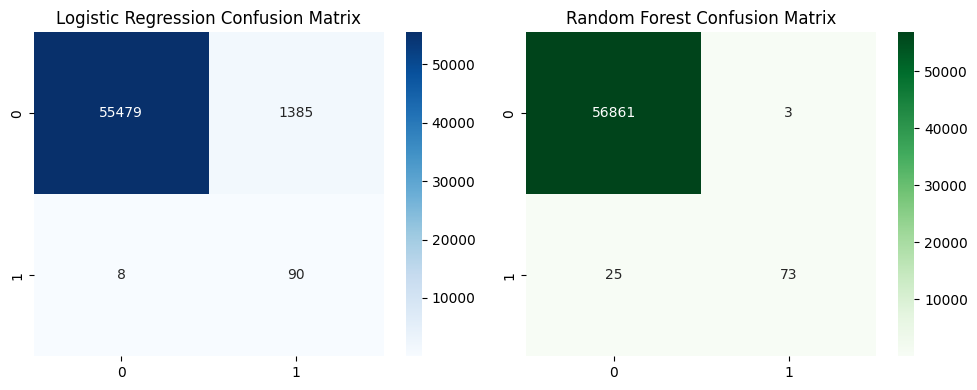

In [17]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 2: Load Original Dataset ---
data = pd.read_csv("creditcard.csv")

# --- Step 3: Check Class Distribution ---
print("✅ Class distribution in dataset:")
print(data["Class"].value_counts())

# --- Step 4: Split Features and Target ---
X = data.drop(columns=["Class"])
y = data["Class"]

# --- Step 5: Train/Test Split (Stratify ensures both classes appear in both sets) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 6: Train Logistic Regression ---
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# --- Step 7: Train Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# --- Step 8: Evaluate Accuracy ---
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("\n📊 Model Accuracy:")
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# --- Step 9: Classification Report (Precision, Recall, F1) ---
print("\n🔍 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\n🌲 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# --- Step 10: Confusion Matrix Visualization ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()
